## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [6]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [7]:
train, test = keras.datasets.cifar10.load_data()

In [8]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [9]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95,0.85]

In [16]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for m in MOMENTUM:
    for nesterov in [True, False]:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with MOMENTUM = {} and nesterov = {}".format(m, str(nesterov)))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nesterov, momentum=m)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-m={},sesterov={}".format(m, str(nesterov))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.95 and nesterov = True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 186us/step - loss: 2.1138 - acc: 0.2065 - val_loss: 1.9674 - val_acc: 0.2698
Epoch 2/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.9336 - acc: 0.2801 - val_loss: 1.9828 - val_acc: 0.2593
Epoch 3/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.9002 - acc: 0.3004 - val_loss: 2.0083 - val_acc: 0.2217
Epoch 4/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.9395 - acc: 0.2587 - val_loss: 1.9850 - val_acc: 0.2436
Epoch 5/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.9523 - acc: 0.2511 - val_loss: 1.9868 - val_acc: 0.2371
Epoch 6/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.9572 - acc: 0.2471 - val_loss: 1.9328 - val_acc: 0.2474
Epoch 7/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.9251 - acc: 0.2672 - val_loss: 1.9413 - 

50000/50000 [==============================] - 9s 182us/step - loss: 2.1221 - acc: 0.2225 - val_loss: 2.0801 - val_acc: 0.2160
Epoch 2/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.9119 - acc: 0.3017 - val_loss: 1.8546 - val_acc: 0.3224
Epoch 3/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.7754 - acc: 0.3595 - val_loss: 1.8135 - val_acc: 0.3475
Epoch 4/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.7054 - acc: 0.3863 - val_loss: 1.8419 - val_acc: 0.3505
Epoch 5/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.6509 - acc: 0.4084 - val_loss: 1.7500 - val_acc: 0.3785
Epoch 6/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.5973 - acc: 0.4301 - val_loss: 1.6402 - val_acc: 0.4103
Epoch 7/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.5762 - acc: 0.4362 - val_loss: 1.6756 - val_acc: 0.4119
Epoch 8/50
50000/50000 [=====================

50000/50000 [==============================] - 9s 179us/step - loss: 1.7718 - acc: 0.3633 - val_loss: 1.7845 - val_acc: 0.3572
Epoch 3/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.6821 - acc: 0.3934 - val_loss: 1.7688 - val_acc: 0.3562
Epoch 4/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.6227 - acc: 0.4171 - val_loss: 1.5880 - val_acc: 0.4364
Epoch 5/50
50000/50000 [==============================] - 8s 161us/step - loss: 1.5662 - acc: 0.4354 - val_loss: 1.6043 - val_acc: 0.4213
Epoch 6/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.5497 - acc: 0.4417 - val_loss: 1.6482 - val_acc: 0.4124
Epoch 7/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.5111 - acc: 0.4556 - val_loss: 1.6009 - val_acc: 0.4298
Epoch 8/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.4908 - acc: 0.4626 - val_loss: 1.5567 - val_acc: 0.4361
Epoch 9/50
50000/50000 [====================

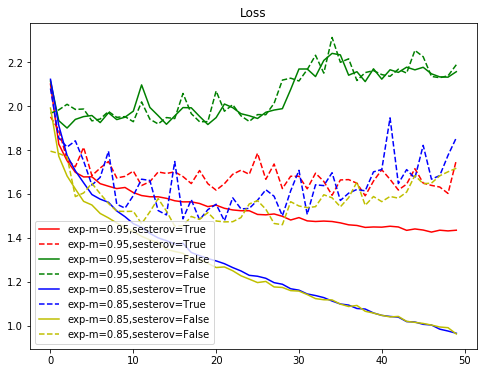

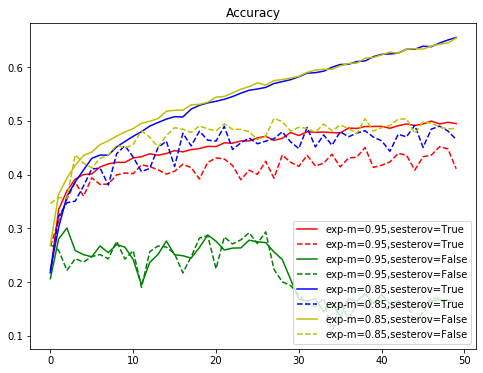

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()